# Getting Started 4: Deep Learning for Cybersecurity

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Resolved&color=green)



**Open notebook on:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/clandolt/mlcysec_notebooks/blob/main/source/tutorial_notebooks/getting_started_with_deep_learning/getting_started_with_deep_learning.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/clandolt/mlcysec_notebooks/blob/main/source/tutorial_notebooks/getting_started_with_deep_learning/getting_started_with_deep_learning.ipynb)   
**Author:** Christoph R. Landolt


In this tutorial, we will use **Neural Networks** to analyze the same dataset as in *Getting Started 3*, aiming to improve detection and insights into cyber attacks.

## Tutorial Objectives

- Become familiar with **PyTorch basics**
- Prepare to **implement Neural Networks** using PyTorch

## Getting Started with PyTorch

PyTorch is an open-source machine learning framework that allows you to **build, train, and optimize neural networks** efficiently.  
We start with PyTorch because it is currently the most widely used framework in academia and research.  

Although other frameworks such as [**TensorFlow**](https://www.tensorflow.org/), [**JAX**](https://docs.jax.dev/en/latest/), [**Flax**](https://flax.readthedocs.io/en/stable/), and [**Caffe**](https://caffe.berkeleyvision.org/) also exist, we recommend mastering one framework deeply (preferably PyTorch). Once you understand its concepts well, switching to another framework becomes much easier.

Even though there are high-level interfaces built on top of some machine learning frameworks—such as [**PyTorch Lightning**](https://lightning.ai/docs/pytorch/stable/) or [**Keras**](https://lightning.ai/docs/pytorch/stable/)—we recommend sticking to the core framework when learning. This helps you develop a deeper understanding of the underlying concepts and mechanisms.

We begin by importing the PyTorch library and checking the installed version.

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.9.0


Notes:

- **torch** is the core PyTorch package providing tensors, automatic differentiation, and neural network building blocks.  
- Printing the version helps ensure compatibility with other libraries and code examples.


In [ ]:
torch.manual_seed(42) # Setting the seed

Notes:

- `torch.manual_seed(42)` sets the random seed for PyTorch’s random number generators.  
- This ensures reproducibility, meaning the same model initialization and results can be reproduced across runs.  
- Common practice in research and experiments to make results consistent.


### Tensors

A **tensor** is a fundamental algebraic object that can be represented as a multi-dimensional array.  
In PyTorch, tensors are similar to NumPy arrays but come with the **added advantage of GPU acceleration**, enabling efficient computation on large datasets.

Working with tensors is likely familiar, as they generalize concepts you already know:
- A **scalar** is a tensor of order 0  
- A **vector** is a tensor of order 1  
- A **matrix** is a tensor of order 2  

Many functions available in NumPy also exist in PyTorch, and you can easily **convert between NumPy arrays and PyTorch tensors**.

#### Initialization of PyTorch Tensors

Let’s explore different ways to create tensors in PyTorch.  
There are multiple options — the simplest one is to call `torch.Tensor()` and pass the desired shape or data as an argument:

In [ ]:
# Creating a tensor with uninitialized values of shape (2, 2, 3)
x = torch.Tensor(2, 2, 3)
print(x)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


The function `torch.Tensor()` allocates memory for the desired tensor but does **not initialize** its values (it may reuse whatever data happens to be in memory).  
To create tensors with explicitly defined values, PyTorch provides several convenient functions:

| Function | Description |
|-----------|-------------|
| `torch.zeros(shape)` | Creates a tensor filled with zeros |
| `torch.ones(shape)` | Creates a tensor filled with ones |
| `torch.rand(shape)` | Creates a tensor with random values uniformly sampled between 0 and 1 |
| `torch.randn(shape)` | Creates a tensor with random values sampled from a normal distribution (mean = 0, variance = 1) |
| `torch.arange(start, end, step)` | Creates a tensor containing evenly spaced values within a given interval |
| `torch.Tensor([list])` | Creates a tensor directly from a Python list of values |

<br>

> Note: Call `torch.manual_seed()` before creating random tensors to ensure reproducibility.

You can also create a tensor from a python list:

In [ ]:
# Creating a tensor with defined values from a Python list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

# Accessing tensor properties as in numpy
print("Shape:", x.shape)

# Accessing the size of the tensor
print("Size:", x.size())

tensor([[1., 2.],
        [3., 4.]])
Shape: torch.Size([2, 2])
Size: torch.Size([2, 2])


You can convert a NumPy array to a PyTorch tensor using `torch.from_numpy(np_arr)` and convert it back to a NumPy array using `tensor.numpy()`, as shown below:

In [ ]:
import numpy as np

# Create a NumPy array
np_arr = np.array([[1, 2], [3, 4]])

# Convert to PyTorch tensor
tensor = torch.from_numpy(np_arr)

print("NumPy array:", type(np_arr))
print("PyTorch tensor:", type(tensor))

# Convert back to NumPy array
np_arr2 = tensor.numpy()
print("Converted back to NumPy array:", type(np_arr2))

NumPy array: <class 'numpy.ndarray'>
PyTorch tensor: <class 'torch.Tensor'>
Converted back to NumPy array: <class 'numpy.ndarray'>


#### PyTorch Tensor Operations
Many operations available in NumPy also exist in PyTorch, which provides a rich set of functions for tensor operations.

* **1. Addition — `torch.add()` or `+`** <br>
Performs element-wise addition of two tensors of the same shape.


In [ ]:
# creating two tensors for addition
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Element-wise addition
c = torch.add(a, b)
print("a + b =", c)

# or simply
d = a + b
print("a + b =", d)

a + b = tensor([5, 7, 9])
a + b = tensor([5, 7, 9])


* **2. Reshaping** — `tensor.view()` <br>
Changes the shape of a tensor without altering its data.
The number of elements must remain the same.

In [ ]:
# Create a tensor with values from 0 to 11
x = torch.arange(12)
# Reshape the tensor to shape (3, 4)
y = x.view(3, 4)
print("Original:", x)
print("Reshaped (3x4):\n", y)


Original: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped (3x4):
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


> Note: `.view()` requires the tensor to be contiguous in memory, meaning its elements are stored in a continuous block according to the logical order of the tensor's dimensions; otherwise, use `.reshape()`.

* **3. Range Creation** — `torch.arange()` <br>
Creates evenly spaced values within a given interval.

In [ ]:
# Create a tensor with values from 0 to 10 with a step of 2
x = torch.arange(start=0, end=10, step=2)
print("arange tensor:", x)

arange tensor: tensor([0, 2, 4, 6, 8])


* **4. Dimension Permutation** — `tensor.permute()`<br>
Reorders the dimensions of a tensor (useful for image or sequence data).

In [ ]:
# Create a random tensor of shape [2, 3, 4]
x = torch.randn(2, 3, 4)  # shape [batch, height, width]
y = x.permute(0, 2, 1)    # swap height and width
print("Original shape:", x.shape)
print("Permuted shape:", y.shape)

Original shape: torch.Size([2, 3, 4])
Permuted shape: torch.Size([2, 4, 3])


* **5. Matrix Multiplication** in PyTorch<br>
PyTorch provides several functions for performing matrix multiplication depending on the dimensionality and use case.
<br>
<br>
    * **5.1 General Matrix Multiplication** — `torch.matmul()` or `@`<br>
Performs matrix multiplication between 2D tensors or higher-dimensional tensors with broadcasting.



In [ ]:
# Define two 2D tensors (matrices)
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

# Using matmul
C = torch.matmul(A, B)

# Equivalent shorthand
D = A @ B

print("Result:\n", C)

Result:
 tensor([[19, 22],
        [43, 50]])


* **5.2. 2D Matrix Multiplication** — `torch.mm()`<br>
Equivalent to torch.matmul() but restricted to 2D matrices only.

In [ ]:
# Using mm for 2D matrix multiplication
C = torch.mm(A, B)
print("2D matrix product shape:", C.shape)

2D matrix product shape: torch.Size([2, 2])


* **5.3. Batch Matrix Multiplication** — `torch.bmm()`<br>
Performs matrix multiplication for a batch of matrices.

In [ ]:
# Define two batches of matrices
A = torch.randn(10, 3, 4)  # batch of 10 matrices (3x4)
B = torch.randn(10, 4, 5)  # batch of 10 matrices (4x5)

# Batch matrix multiplication
C = torch.bmm(A, B)
print("Batch matrix product shape:", C.shape)

Batch matrix product shape: torch.Size([10, 3, 5])


* **6. Einstein Summation** — `torch.einsum()`<br>
`torch.einsum()` is a powerful function that allows expressing complex tensor operations such as tensor contractions, transpositions, and reductions using index notation.

In [ ]:
# Define two matrices
A = torch.randn(2, 3)
B = torch.randn(3, 4)

# Einstein summation: 'ik,kj->ij' means: sum over index k, resulting in indices i and j.
# Operation: Matrix multiplication (sum over the shared index k)
C = torch.einsum('ik,kj->ij', A, B) # This is equivalent to torch.matmul(A, B) but generalized for more complex tensor operations.

print("Einstein summation result shape:", C.shape)

Einstein summation result shape: torch.Size([2, 4])


* **7. Flattening** — `torch.flatten()`<br>
Flattens a tensor into one dimension.

In [ ]:
# Create a 2D tensor
x = torch.tensor([[1, 2], [3, 4]])
y = torch.flatten(x)
print("Flattened tensor:", y)

Flattened tensor: tensor([1, 2, 3, 4])


* **8. Dot Product** — `torch.dot()`<br>
Computes the dot product between two 1D tensors (vectors).

In [ ]:
# Define two 1D tensors (vectors)
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Compute the dot product
dot = torch.dot(a, b)
print("Dot product:", dot)

Dot product: tensor(32)


## Anomaly Detection using a Neural Network with the KDDCUP99 Dataset

In this example, we get started with neural networks in PyTorch and will train a simple model to detect anomalies, which correspond to potential cyber attacks.

The biggest advantage of using neural networks instead of classic machine learning approaches is their ability to discover and learn new features that might be overlooked by manual feature engineering.  
Multilayer neural networks can perform feature learning by learning a representation of their input at the hidden layer(s), which is then used for classification or regression at the output layer.

<img src="https://github.com/clandolt/mlcysec_notebooks/blob/main/source/tutorial_notebooks/getting_started_with_deep_learning/Simple_Classifier.jpg?raw=1" alt="Simple_Classifier" width="400"/>

In the next steps, we will demonstrate how to implement a simple neural network for classification to detect potential cyber attacks.

Let's start by importing all the necessary libraries:

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

### Data Loading and Preprocessing
The first crucial step in any machine learning project is preparing your data. Here, we'll load a subset of the KDD Cup 99 dataset, preprocess it, and split it into training and testing sets.

We use `sklearn.datasets.fetch_kddcup99` to load the dataset. We specify subset="SA" to get a simplified version of the dataset, percent10=True to use a 10% subset (for faster execution in a tutorial), and as_frame=True to load it as a Pandas DataFrame.

In [2]:
# Load the KDDCUP99 dataset (subset: SA) from sklearn
X, y = datasets.fetch_kddcup99(
    subset="SA",
    percent10=True,
    random_state=42,
    return_X_y=True,
    as_frame=True
)

The original labels are byte strings (e.g., b"normal.", b"smurf."). We convert them into a binary format:
- `1` for any type of attack
- `0` for normal connections.

In [3]:
# Convert binary label: 1 = attack, 0 = normal
y = (y != b"normal.").astype(np.int32)

The KDD Cup 99 dataset contains categorical features. Neural networks typically work best with numerical inputs, so we use `pd.get_dummies` to perform one-hot encoding, converting these categorical columns into numerical binary features.

In [4]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print(f"Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}")


Numeric cols: 0 | Categorical cols: 41


Numerical features often have different scales, which can make training neural networks difficult. `StandardScaler` standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model's learning.

In [5]:
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),   # scales ONLY numerics
        ("cat", ohe, cat_cols),                # one-hot, stays sparse
    ],
    remainder="drop",
)

# Fit on all X if you aren't doing a train/test split yet
preprocessor.fit(X)

# Transform to a sparse design matrix (CSR)
X_prepared = preprocessor.transform(X)   # SciPy sparse matrix
X_prepared


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4126855 stored elements and shape (100655, 18751)>

In [6]:
feat_names = []
if num_cols:
    feat_names.extend(num_cols)

# get one-hot names
try:
    cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()
except AttributeError:
    # older sklearn fallback
    cat_names = preprocessor.named_transformers_["cat"].get_feature_names(cat_cols).tolist()

feat_names.extend(cat_names)
print(f"Total features: {len(feat_names)}")

Total features: 18751


We split the preprocessed data into training (80%) and testing (20%) sets using train_test_split. random_state ensures reproducibility, and `stratify=y` ensures that the proportion of normal and attack samples is preserved in both the training and test sets.

In [7]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if hasattr(y, "iloc") else None
)

# Column selection based on train set
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

# OneHotEncoder arg changed in newer sklearn
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),  # only true numerics
        ("cat", ohe, cat_cols),               # keep one-hots sparse
    ],
    remainder="drop",
)

preprocessor.fit(X_train)
X_train_csr = preprocessor.transform(X_train)  # SciPy CSR matrix
X_test_csr  = preprocessor.transform(X_test)
print("CSR shapes:", X_train_csr.shape, X_test_csr.shape)

CSR shapes: (80524, 17085) (20131, 17085)


In [9]:
from sklearn.preprocessing import LabelEncoder
if pd.api.types.is_numeric_dtype(y_train):
    y_train_enc = np.asarray(y_train)
    y_test_enc  = np.asarray(y_test)
else:
    le = LabelEncoder().fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc  = le.transform(y_test)

# # --- Regression (ensure float) ---
# y_train_enc = np.asarray(y_train, dtype=np.float32)
# y_test_enc  = np.asarray(y_test, dtype=np.float32)

print("y types:", y_train_enc.dtype, y_test_enc.dtype)


y types: int32 int32


In [10]:
from torch.utils.data import Dataset, DataLoader


class CSRDataset(Dataset):
    def __init__(self, X_csr, y_array, y_dtype=None):
        self.X = X_csr
        self.y = np.asarray(y_array)
        self.y_dtype = y_dtype
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self, idx):
        # Densify one row only
        x = self.X.getrow(idx).toarray().ravel().astype(np.float32, copy=False)
        if self.y_dtype == "long":
            y = torch.tensor(self.y[idx], dtype=torch.long)
        elif self.y_dtype == "float":
            y = torch.tensor(self.y[idx], dtype=torch.float32)
        else:
            y = torch.tensor(self.y[idx])
        return torch.from_numpy(x), y

# Choose y dtype
y_dtype = "long"  # for classification
# y_dtype = "float"  # for regression

train_ds = CSRDataset(X_train_csr, y_train_enc, y_dtype=y_dtype)
test_ds  = CSRDataset(X_test_csr,  y_test_enc,  y_dtype=y_dtype)

train_loader = DataLoader(train_ds, batch_size=1024, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_ds,  batch_size=2048, shuffle=False, num_workers=2)


In [11]:
TOP_K = 50  # adjust down if memory is tight

def prepare_dense_float32_train_test(X_train, X_test, top_k=TOP_K, scale_continuous=True):
    X_train = X_train.copy()
    X_test  = X_test.copy()

    # Identify types on TRAIN (freeze schema from train only)
    num_cols  = X_train.select_dtypes(include=[np.number, "bool", "boolean"]).columns.tolist()
    cat_cols  = [c for c in X_train.columns if c not in num_cols]

    # 1) Cap categorical cardinality using TRAIN frequencies, add __OTHER__ bucket
    for c in cat_cols:
        top = X_train[c].astype("string").value_counts(dropna=False).index[:top_k].tolist()
        cat = pd.Categorical(
            X_train[c].astype("string").where(X_train[c].astype("string").isin(top), "__OTHER__"),
            categories=top + ["__OTHER__"]
        )
        X_train[c] = cat
        # Apply SAME categories to TEST
        cat_test = pd.Categorical(
            X_test[c].astype("string").where(X_test[c].astype("string").isin(top), "__OTHER__"),
            categories=cat.categories
        )
        X_test[c] = cat_test

    # 2) Numerics → float32 (bools become 0/1 floats so PyTorch is happy)
    if num_cols:
        X_train[num_cols] = X_train[num_cols].apply(pd.to_numeric, errors="coerce").astype(np.float32)
        X_test[num_cols]  = X_test[num_cols].apply(pd.to_numeric,  errors="coerce").astype(np.float32)

    # 3) One-hot ONLY the categorical columns; categorical dtype ensures identical columns
    X_train_cat = pd.get_dummies(X_train[cat_cols], dtype=np.float32)
    X_test_cat  = pd.get_dummies(X_test[cat_cols],  dtype=np.float32)

    # 4) Concatenate numerics + one-hots
    if num_cols:
        X_train_num = X_train[num_cols]
        X_test_num  = X_test[num_cols]
        X_train_out = pd.concat([X_train_num, X_train_cat], axis=1)
        X_test_out  = pd.concat([X_test_num,  X_test_cat],  axis=1)
    else:
        X_train_out, X_test_out = X_train_cat, X_test_cat

    # 5) (Optional) Scale only continuous-like numeric columns (skip 0/1)
    if num_cols and scale_continuous:
        # heuristic: more than 2 unique values in TRAIN → continuous
        cont_cols = [c for c in num_cols if pd.Series(X_train_out[c]).nunique(dropna=True) > 2]
        if cont_cols:
            scaler = StandardScaler()
            X_train_out.loc[:, cont_cols] = scaler.fit_transform(
                X_train_out[cont_cols].to_numpy(dtype=np.float32, copy=False)
            ).astype(np.float32, copy=False)
            X_test_out.loc[:, cont_cols] = scaler.transform(
                X_test_out[cont_cols].to_numpy(dtype=np.float32, copy=False)
            ).astype(np.float32, copy=False)

    # 6) Sanity: ensure same columns/order; fill any missing with 0
    X_train_out, X_test_out = X_train_out.align(X_test_out, join="outer", axis=1, fill_value=0.0)
    X_train_out = X_train_out.astype(np.float32, copy=False)
    X_test_out  = X_test_out.astype(np.float32,  copy=False)

    # Optional: drop exact-constant columns to trim width
    nunq = X_train_out.nunique()
    keep = nunq.index[nunq > 1]
    X_train_out = X_train_out[keep]
    X_test_out  = X_test_out[keep]

    print("Prepared shapes:", X_train_out.shape, X_test_out.shape)
    print("RAM (GB): train", X_train_out.memory_usage(deep=True).sum()/1e9,
          "| test", X_test_out.memory_usage(deep=True).sum()/1e9)
    return X_train_out, X_test_out

In [12]:
X_train, X_test = prepare_dense_float32_train_test(X_train, X_test, top_k=TOP_K, scale_continuous=True)


Prepared shapes: (80524, 1207) (20131, 1207)
RAM (GB): train 0.389414064 | test 0.097353516


### PyTorch Tensors and DataLoaders
For PyTorch models, data needs to be in torch.Tensor format. We also use DataLoader for efficient batching and shuffling of data during training.

In [18]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # shape (N,1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

**Notes:**
- `torch.tensor(..., dtype=torch.float32)`: Converts our NumPy arrays (from Pandas DataFrames) into PyTorch tensors, specifying float32 as the data type.
- `.unsqueeze(1)`: The labels y are initially a 1D array. For binary classification with nn.BCELoss, PyTorch expects the target to have a shape of (N, 1) where N is the batch size, so we add an extra dimension.
- `TensorDataset`: Combines our input features (X_train_tensor) and corresponding labels (y_train_tensor) into a single dataset object.
- `DataLoader`: Creates an iterable over our datasets.
    - `batch_size=64`: The number of samples processed at once.
    - `shuffle=True` (for training): Randomizes the order of data points in each epoch, which helps the model generalize better and prevents it from memorizing the order of samples.
    - `shuffle=False` (for testing): We don't need to shuffle the test data; we just want to iterate through it once.

### The Model (`nn.Module`)
In PyTorch, neural networks are built by extending the `nn.Module` class. This class provides the fundamental building blocks for all neural network architectures.


In [14]:
import torch.nn as nn

The torch.nn package defines a series of useful classes like linear network layers, activation functions, loss functions, and more. It's the core for defining your network's architecture.
<br>
<br>

**`nn.Module` Basics**
<br>

Every neural network in PyTorch inherits from `nn.Module`. It has two main methods you need to implement:
- `__init__(self, ...)`: This is where you define the layers and components of your network.
- `forward(self, x)`: This method defines how the input x flows through the layers defined in `__init__` to produce an output.
<br>
<br>

**Defining KDDNet**
<br>
Let's define our specific neural network for KDD Cup 99 classification.

In [15]:
# --- Define the neural network ---
class KDDNet(nn.Module):
    def __init__(self, input_dim):
        super(KDDNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.Tanh(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()  # For binary classification
        )

    def forward(self, x):
        return self.model(x)

**Notes:**

*   `super(KDDNet, self).__init__()`: Always call the constructor of the parent class `nn.Module`.
*   `self.model = nn.Sequential(...)`: This is a convenient way to stack layers sequentially.
    *   `nn.Linear(input_dim, 128)`: The first fully connected (linear) layer. It takes `input_dim` features from our data and transforms them into 128 output features.
    *   `nn.Tanh()`: The hyperbolic tangent activation function, which outputs values in the range `[-1, 1]` and introduces non-linearity.
    *   `nn.Dropout(0.3)`: A regularization technique that randomly sets 30% of the input features to zero during training. This helps prevent overfitting by making the network less reliant on specific neurons.
    *   The pattern of `Linear -> Tanh -> Dropout` is repeated for a second hidden layer (`128` to `64` neurons).
    *   `nn.Linear(64, 1)`: The output layer. Since this is binary classification, we want a single output neuron.
    *   `nn.Sigmoid()`: This activation function squashes the output of the final linear layer into a range between 0 and 1, which can be interpreted as a probability for the positive class (attack).

### Instantiating the Model
We determine `input_dim` from the number of features in our training data (`X_train.shape[1]`) and then create an instance of our KDDNet model.

In [16]:
# Instantiate the model
input_dim = X_train.shape[1]
model = KDDNet(input_dim)
print(model)

KDDNet(
  (model): Sequential(
    (0): Linear(in_features=1207, out_features=128, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Tanh()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


### Loss Function and Optimizer
Now that we have our model, we need to define how we'll measure its performance (the loss function) and how it will learn (the optimizer).

In [19]:
# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Notes:**
*   `criterion = nn.BCELoss()`: For binary classification problems where the model's output is already passed through a sigmoid function (producing probabilities between 0 and 1), Binary Cross-Entropy Loss is a standard choice. It measures the difference between the predicted probabilities and the true binary labels.
*   `optimizer = optim.Adam(model.parameters(), lr=0.001)`: The optimizer is responsible for updating the model's parameters (weights and biases) during training to minimize the loss.
    *   `model.parameters()`: This tells the optimizer which parameters it needs to update.
    *   `lr=0.001`: The learning rate, a crucial hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function. Adam is an adaptive learning rate optimizer that generally performs well.
*   The optimizer provides two important functions for the training loop:
    *   `optimizer.zero_grad()`: Sets the gradients of all optimized `torch.Tensor`s to zero. This is essential before `loss.backward()` because PyTorch accumulates gradients by default.
    *   `optimizer.step()`: Performs a single optimization step (parameter update).

### Training Loop
The training loop is where the model learns from the data over multiple epochs. An epoch refers to one full pass through the entire training dataset.

**Inside the Training Loop:**

*   `model.train()`: Sets the model to training mode. This is important because certain layers (like `Dropout` and `BatchNorm`) behave differently during training and evaluation.
*   `running_loss = 0.0`: Initializes a variable to accumulate the loss over all batches in the current epoch.
*   `for X_batch, y_batch in train_loader:`: Iterates through batches of data from the `train_loader`.
*   `optimizer.zero_grad()`: Clears the gradients from the previous iteration.
*   `outputs = model(X_batch)`: Performs a forward pass, feeding the input batch through the model to get predictions.
*   `loss = criterion(outputs, y_batch)`: Calculates the loss between the model's predictions (`outputs`) and the true labels (`y_batch`).
*   `loss.backward()`: Computes the gradients of the loss with respect to all learnable parameters in the model.
*   `optimizer.step()`: Updates the model's parameters using the calculated gradients.
*   `running_loss += loss.item() * X_batch.size(0)`: Accumulates the loss for the epoch. `loss.item()` gets the scalar value of the loss, and we multiply by `X_batch.size(0)` to account for the batch size.
*   `epoch_train_loss`: Calculates the average training loss for the current epoch.

**Inside the Evaluation Step (within the loop):**

*   `model.eval()`: Sets the model to evaluation mode. This disables `Dropout` and ensures layers like `BatchNorm` use their trained statistics.
*   `with torch.no_grad():`: Disables gradient calculations. This saves memory and speeds up computations because we don't need to compute gradients during evaluation.
*   The process for calculating `running_test_loss` is similar to the training loss, but without gradient calculations or parameter updates.
*   `epoch_test_loss`: Calculates the average test loss for the current epoch.
*   `print(...)`: Provides real-time feedback on the training and test loss for each epoch.

In [20]:
# --- Training loop with loss tracking ---
n_epochs = 20
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    # --- Training ---
    model.train() # Set model to training mode
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad() # Zero the gradients
        outputs = model(X_batch) # Forward pass
        loss = criterion(outputs, y_batch) # Calculate loss
        loss.backward() # Backpropagation
        optimizer.step() # Update weights
        running_loss += loss.item() * X_batch.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # --- Evaluation on test set ---
    model.eval() # Set model to evaluation mode
    running_test_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation for efficiency
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_test_loss += loss.item() * X_batch.size(0)
    epoch_test_loss = running_test_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    # Optional: print progress
    print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {epoch_train_loss:.4f} - Test Loss: {epoch_test_loss:.4f}")

Epoch 1/20 - Train Loss: 0.0114 - Test Loss: 0.0026
Epoch 2/20 - Train Loss: 0.0015 - Test Loss: 0.0027
Epoch 3/20 - Train Loss: 0.0012 - Test Loss: 0.0017
Epoch 4/20 - Train Loss: 0.0010 - Test Loss: 0.0017
Epoch 5/20 - Train Loss: 0.0006 - Test Loss: 0.0029
Epoch 6/20 - Train Loss: 0.0006 - Test Loss: 0.0024
Epoch 7/20 - Train Loss: 0.0005 - Test Loss: 0.0023
Epoch 8/20 - Train Loss: 0.0003 - Test Loss: 0.0017
Epoch 9/20 - Train Loss: 0.0003 - Test Loss: 0.0018
Epoch 10/20 - Train Loss: 0.0005 - Test Loss: 0.0019
Epoch 11/20 - Train Loss: 0.0003 - Test Loss: 0.0020
Epoch 12/20 - Train Loss: 0.0003 - Test Loss: 0.0021
Epoch 13/20 - Train Loss: 0.0004 - Test Loss: 0.0013
Epoch 14/20 - Train Loss: 0.0002 - Test Loss: 0.0013
Epoch 15/20 - Train Loss: 0.0002 - Test Loss: 0.0024
Epoch 16/20 - Train Loss: 0.0002 - Test Loss: 0.0039
Epoch 17/20 - Train Loss: 0.0003 - Test Loss: 0.0037
Epoch 18/20 - Train Loss: 0.0002 - Test Loss: 0.0015
Epoch 19/20 - Train Loss: 0.0003 - Test Loss: 0.0012
Ep

### Plotting Training and Test Loss
Visualizing the loss over epochs is crucial for understanding how well your model is learning and to detect issues like overfitting.

This code generates a line plot showing the training loss and test loss across all epochs. Ideally, both losses should decrease, and the test loss should stay close to the training loss to indicate good generalization. If the training loss continues to decrease but the test loss starts to increase, it's a sign of overfitting.

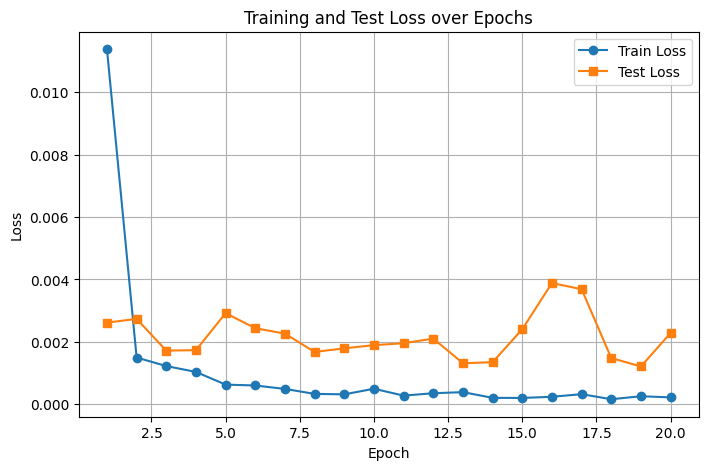

In [21]:
# --- Plot train and test loss ---
plt.figure(figsize=(8,5))
plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, n_epochs+1), test_losses, label='Test Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()



### Final Evaluation and Accuracy
After training, we perform a final evaluation on the test set to get the overall accuracy.

In [22]:
# --- Final evaluation ---
model.eval() # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test_tensor) # Get raw predictions
    y_pred_label = (y_pred >= 0.5).float() # Convert probabilities to binary labels (0 or 1)
    accuracy = (y_pred_label == y_test_tensor).float().mean().item() # Calculate accuracy
    print(f"Final Test Accuracy: {accuracy:.4f}")



Final Test Accuracy: 0.9997


**Notes:**
*   `y_pred = model(X_test_tensor)`: We pass the entire test set through the trained model to get its probability predictions.
*   `y_pred_label = (y_pred >= 0.5).float()`: Since our model outputs probabilities (due to the `Sigmoid` layer), we convert these probabilities into binary class labels. Any probability of 0.5 or greater is classified as `1` (attack), otherwise `0` (normal).
*   `accuracy = (y_pred_label == y_test_tensor).float().mean().item()`: We compare the predicted binary labels with the true test labels to calculate the accuracy. `mean()` gives the proportion of correct predictions.

### Confusion Matrix
A confusion matrix provides a more detailed breakdown of the model's performance than just accuracy, especially useful in imbalanced datasets.
The confusion matrix will show you:
- **True Negatives (TN):** Correctly predicted normal connections.
- **False Positives (FP):** Normal connections incorrectly predicted as attacks.
- **False Negatives (FN):** Attack connections incorrectly predicted as normal.
- **True Positives (TP):** Correctly predicted attack connections.
This comprehensive evaluation helps in understanding not just how accurate the model is, but also where it makes errors.


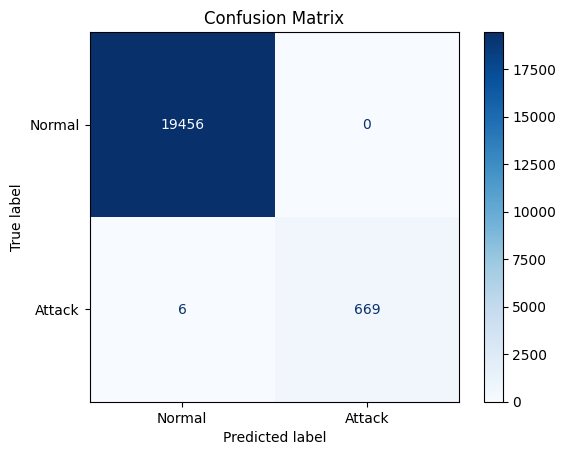

In [23]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test_tensor.numpy(), y_pred_label.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Attack"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



**Notes:**
*   `confusion_matrix(y_test_tensor.numpy(), y_pred_label.numpy())`: This function from `sklearn.metrics` calculates the confusion matrix using the true labels and the predicted labels. We convert PyTorch tensors to NumPy arrays for compatibility.
*   `ConfusionMatrixDisplay(...)`: This class helps in visualizing the confusion matrix.
    *   `display_labels=["Normal", "Attack"]`: Assigns meaningful names to our classes.
*   `disp.plot(cmap=plt.cm.Blues)`: Plots the confusion matrix with a blue colormap.
*   `plt.title("Confusion Matrix")`: Sets the title of the plot.

## Unsupervised Dimensionality Reduction with Autoencoders on KDD Cup 99
In this tutorial, we will delve into **Autoencoders (AEs)**, a type of neural network designed for unsupervised dimensionality reduction. An Autoencoder comprises two primary components: an **encoder** that compresses input data into a lower-dimensional feature vector (known as the "bottleneck" or latent space), and a **decoder** that reconstructs the original input data from this compressed representation. The network is trained by minimizing the discrepancy between the input and its reconstruction, compelling the latent space to capture the most salient features of the data.

<img src="https://github.com/clandolt/mlcysec_notebooks/blob/main/source/tutorial_notebooks/getting_started_with_deep_learning/Autoencoder.jpg?raw=1" alt="Autoencoder" width="600"/>


This approach is highly valuable for:
- Dimensionality Reduction: Compressing high-dimensional datasets into a more concise and manageable form.
- Feature Learning: Automatically discovering meaningful data features without requiring explicit labels.
We will implement a classical autoencoder and apply it to the KDD Cup 99 dataset to demonstrate its capability in reducing data dimensionality.

As the libraries and the dataset is allready imported in this notebook, we'll directly start with the implementation of the autoencoder.

### The Autoencoder Model (`nn.Module`)
An autoencoder's architecture is inherently symmetrical: an encoder compresses the input, and a decoder then expands this compressed representation back to the original input dimension. We define both parts within a single nn.Module class.


In [24]:
# --- Define the Autoencoder Network ---
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, latent_dim),
            nn.Tanh() # Use Tanh for activation
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, input_dim)
            # No activation on the output layer for reconstruction, especially with StandardScaler normalized data
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded # Return both decoded output and latent representation

**Notes:**
*   `super(Autoencoder, self).__init__()`: Calls the constructor of the base `nn.Module` class.
*   `self.encoder = nn.Sequential(...)`: This defines the encoding part of the autoencoder. It consists of several `nn.Linear` (fully connected) layers interspersed with `nn.Tanh()` activation functions. `nn.Tanh()` (Hyperbolic Tangent) is an activation function that squashes values between -1 and 1, which can be effective when input data is normalized around zero. The final `nn.Linear` layer in the encoder reduces the features to `latent_dim`, representing the compressed data.
    *   `nn.Linear(input_dim, 128)`: Maps the high-dimensional input to 128 features.
    *   `nn.Tanh()`: The activation function applied after each linear transformation.
    *   `nn.Linear(64, latent_dim)`: Compresses the features down to the specified `latent_dim`.
*   `self.decoder = nn.Sequential(...)`: This defines the decoding part, which mirrors the encoder's structure. It takes the `latent_dim` representation and expands it back to the `input_dim` of the original data using `nn.Linear` layers and `nn.Tanh()` activations.
    *   `nn.Linear(latent_dim, 64)`: Expands the latent representation.
    *   `nn.Linear(128, input_dim)`: The final layer reconstructs the data to its original dimension. No activation is typically applied here, as our input data (and thus the desired output) is standardized and can contain negative values.
*   `forward(self, x)`: Specifies the forward pass logic. The input `x` is first processed by the `encoder` to obtain `encoded` (the latent representation), and then this `encoded` representation is fed to the `decoder` to produce `decoded` (the reconstruction). Both `decoded` and `encoded` outputs are returned.

### Instantiating the Model
We determine the `input_dim` from the number of features in our training data (`X_train.shape[1]`). For straightforward visualization of the compressed data, we set `latent_dim` to 2.


In [25]:
# Instantiate Autoencoder
input_dim = X_train.shape[1]
latent_dim = 2 # Keeping latent_dim small for 2D visualization
autoencoder = Autoencoder(input_dim, latent_dim)

print(autoencoder)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1207, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=2, bias=True)
    (5): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): Tanh()
    (4): Linear(in_features=128, out_features=1207, bias=True)
  )
)


### Loss Function and Optimizer
For a classical autoencoder, the training objective is to minimize the difference between the input data and its reconstructed version. The Mean Squared Error (MSE) is a standard choice for this reconstruction loss.

In [26]:
# Loss and optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss for reconstruction
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

**Notes:**
*   `criterion = nn.MSELoss()`: Calculates the mean squared difference between corresponding elements of the input and its reconstructed output. Minimizing this loss encourages the autoencoder to produce highly accurate reproductions of the original inputs.
*   `optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)`: The Adam optimizer is employed to update the model's parameters (weights and biases) during training. `autoencoder.parameters()` specifies which parameters the optimizer should adjust, and `lr` sets the learning rate.

### Training Loop
The training loop iterates through the dataset for a defined number of epochs, performing the forward pass, calculating the loss, executing backpropagation, and updating the model's parameters.

**Inside the Training Loop:**

1.  `autoencoder.train()`: Sets the model to training mode, which affects certain layers if present (though not `nn.Tanh`).
2.  `X_batch = X_batch_tuple[0]`: Extracts the actual data tensor from the tuple returned by the `DataLoader`.
3.  `optimizer.zero_grad()`: Clears any accumulated gradients from previous iterations.
4.  `recon_X, _ = autoencoder(X_batch)`: Performs a forward pass, feeding the input batch through the autoencoder. We obtain `recon_X` (the reconstructed input) and discard the latent representation (`_`) for loss calculation.
5.  `loss = criterion(recon_X, X_batch)`: Calculates the reconstruction loss between the `recon_X` and the original `X_batch`.
6.  `loss.backward()`: Computes the gradients of the loss with respect to all learnable parameters.
7.  `optimizer.step()`: Updates the model's parameters using the calculated gradients.
8.  `running_train_loss`: Accumulates the loss across all batches for the current epoch.

**Inside the Evaluation Step:**

1.  `autoencoder.eval()`: Sets the model to evaluation mode, ensuring consistent behavior (e.g., no dropout, if used).
2.  `with torch.no_grad()`: Disables gradient computations, saving memory and speeding up the process, as gradients are not needed during evaluation.
3.  Similar to the training loop, the reconstruction loss is calculated on the `test_loader` to monitor the model's generalization performance on unseen data.

In [27]:
# --- Training loop ---
n_epochs = 20 # Number of epochs
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    # Training
    autoencoder.train()
    running_train_loss = 0.0
    for X_batch_tuple in train_loader:
        X_batch = X_batch_tuple[0] # Dataloader returns a tuple even with single tensor
        optimizer.zero_grad()
        recon_X, _ = autoencoder(X_batch) # We only need the reconstructed output for loss
        loss = criterion(recon_X, X_batch) # Compare reconstructed with original input
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * X_batch.size(0)

    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Evaluation
    autoencoder.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for X_batch_tuple in test_loader:
            X_batch = X_batch_tuple[0]
            recon_X, _ = autoencoder(X_batch)
            loss = criterion(recon_X, X_batch)
            running_test_loss += loss.item() * X_batch.size(0)

    epoch_test_loss = running_test_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f"Epoch {epoch+1}/{n_epochs} - Train Recon Loss: {epoch_train_loss:.6f} - Test Recon Loss: {epoch_test_loss:.6f}")

Epoch 1/20 - Train Recon Loss: 0.006426 - Test Recon Loss: 0.005472
Epoch 2/20 - Train Recon Loss: 0.005261 - Test Recon Loss: 0.005063
Epoch 3/20 - Train Recon Loss: 0.005008 - Test Recon Loss: 0.004969
Epoch 4/20 - Train Recon Loss: 0.004925 - Test Recon Loss: 0.004893
Epoch 5/20 - Train Recon Loss: 0.004859 - Test Recon Loss: 0.004843
Epoch 6/20 - Train Recon Loss: 0.004789 - Test Recon Loss: 0.004744
Epoch 7/20 - Train Recon Loss: 0.004730 - Test Recon Loss: 0.004698
Epoch 8/20 - Train Recon Loss: 0.004694 - Test Recon Loss: 0.004675
Epoch 9/20 - Train Recon Loss: 0.004658 - Test Recon Loss: 0.004644
Epoch 10/20 - Train Recon Loss: 0.004608 - Test Recon Loss: 0.004598
Epoch 11/20 - Train Recon Loss: 0.004559 - Test Recon Loss: 0.004550
Epoch 12/20 - Train Recon Loss: 0.004524 - Test Recon Loss: 0.004561
Epoch 13/20 - Train Recon Loss: 0.004501 - Test Recon Loss: 0.004507
Epoch 14/20 - Train Recon Loss: 0.004477 - Test Recon Loss: 0.004467
Epoch 15/20 - Train Recon Loss: 0.004457 - 

### Plotting Training and Test Loss
Visualizing the reconstruction loss over epochs is essential for monitoring the training process and diagnosing issues like underfitting or overfitting.
This plot displays the Mean Squared Error for both the training and test sets over the course of training. Ideally, both loss curves should decrease steadily, indicating that the autoencoder is learning to reconstruct the data. If the test loss flattens or begins to increase while the training loss continues to fall, it suggests the model might be overfitting to the training data.

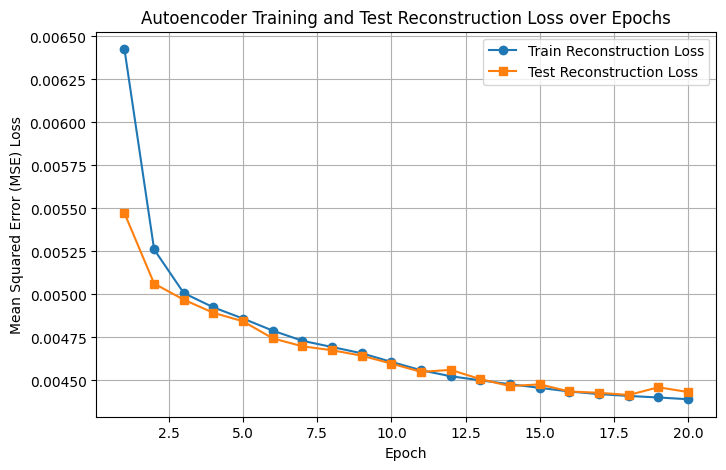

In [28]:
# --- Plot train and test loss ---
plt.figure(figsize=(8,5))
plt.plot(range(1, n_epochs+1), train_losses, label='Train Reconstruction Loss', marker='o')
plt.plot(range(1, n_epochs+1), test_losses, label='Test Reconstruction Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE) Loss')
plt.title('Autoencoder Training and Test Reconstruction Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

### Visualizing the 2D Latent Space (Dimensionality Reduction)
One of the most compelling applications of autoencoders is their ability to perform dimensionality reduction. By setting latent_dim=2, we can directly visualize the compressed representation of our KDD Cup 99 dataset.

In this section, we extract the latent representations (z) for the entire training set. Each original high-dimensional data point is now represented by just two values (corresponding to Latent Dimension 1 and Latent Dimension 2). We then plot these 2D points, applying color-coding based on their original y_train labels (normal or attack).
A successful autoencoder, after learning meaningful features, might show distinct clusters in this 2D latent space. For instance, normal connections might group together, while different types of attacks could form separate (or partially overlapping) clusters. This visualization directly demonstrates the autoencoder's capability to reduce data dimensionality while preserving underlying structural and categorical information.

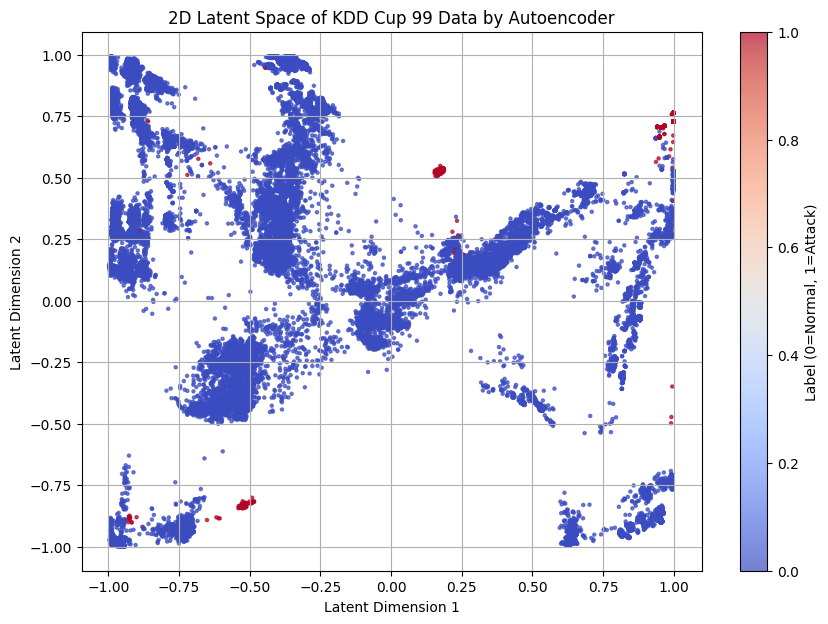

In [29]:
# --- Visualize 2D latent space ---
autoencoder.eval()
with torch.no_grad():
    _, z_train = autoencoder(X_train_tensor) # Get latent representations
    z_train_np = z_train.numpy() # Convert to NumPy for plotting

plt.figure(figsize=(10,7))
# Use the original KDD labels for coloring, to see if clusters emerge
scatter = plt.scatter(z_train_np[:,0], z_train_np[:,1], c=y_train.values, cmap='coolwarm', alpha=0.7, s=5)
plt.colorbar(scatter, label='Label (0=Normal, 1=Attack)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Latent Space of KDD Cup 99 Data by Autoencoder')
plt.grid(True)
plt.show()

## Exercises
In this exercise, we will learn how to implement neural networks for classification and feature representation tasks using `PyTorch`.

### Exercise 1: Simple Classifier Network
1. Implement a simple classifier network with **3 layers**, using the [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) activation function for the hidden layers.  
2. Train the network on the preprocessed KDD Cup 99 training data.  
3. Evaluate the network on the test data, reporting accuracy and plotting the confusion matrix.  
4. Experiment with the **width and depth** of the network. At what point does overfitting start to occur?

In [30]:
# TODO: Step 1 - Define your neural network class (3 layers, ReLU activations)
# --- Define the neural network ---
class KDDNet(nn.Module):
    def __init__(self, input_dim):
        super(KDDNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()  # For binary classification
        )

    def forward(self, x):
        return self.model(x)



In [31]:
# TODO: Step 2 - Instantiate your model, define criterion and optimizer
# Instantiate the model
input_dim = X_train.shape[1]
model = KDDNet(input_dim)
print(model)

KDDNet(
  (model): Sequential(
    (0): Linear(in_features=1207, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
    (10): Sigmoid()
  )
)


In [32]:
# TODO: Step 3 - Implement training loop with loss tracking

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training loop with loss tracking ---
n_epochs = 20
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    # --- Training ---
    model.train() # Set model to training mode
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad() # Zero the gradients
        outputs = model(X_batch) # Forward pass
        loss = criterion(outputs, y_batch) # Calculate loss
        loss.backward() # Backpropagation
        optimizer.step() # Update weights
        running_loss += loss.item() * X_batch.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # --- Evaluation on test set ---
    model.eval() # Set model to evaluation mode
    running_test_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation for efficiency
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_test_loss += loss.item() * X_batch.size(0)
    epoch_test_loss = running_test_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    # Optional: print progress
    print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {epoch_train_loss:.4f} - Test Loss: {epoch_test_loss:.4f}")




Epoch 1/20 - Train Loss: 0.0218 - Test Loss: 0.0033
Epoch 2/20 - Train Loss: 0.0022 - Test Loss: 0.0033
Epoch 3/20 - Train Loss: 0.0015 - Test Loss: 0.0029
Epoch 4/20 - Train Loss: 0.0010 - Test Loss: 0.0044
Epoch 5/20 - Train Loss: 0.0008 - Test Loss: 0.0021
Epoch 6/20 - Train Loss: 0.0011 - Test Loss: 0.0025
Epoch 7/20 - Train Loss: 0.0004 - Test Loss: 0.0022
Epoch 8/20 - Train Loss: 0.0003 - Test Loss: 0.0013
Epoch 9/20 - Train Loss: 0.0003 - Test Loss: 0.0027
Epoch 10/20 - Train Loss: 0.0004 - Test Loss: 0.0017
Epoch 11/20 - Train Loss: 0.0008 - Test Loss: 0.0015
Epoch 12/20 - Train Loss: 0.0003 - Test Loss: 0.0022
Epoch 13/20 - Train Loss: 0.0001 - Test Loss: 0.0029
Epoch 14/20 - Train Loss: 0.0003 - Test Loss: 0.0025
Epoch 15/20 - Train Loss: 0.0003 - Test Loss: 0.0023
Epoch 16/20 - Train Loss: 0.0002 - Test Loss: 0.0023
Epoch 17/20 - Train Loss: 0.0017 - Test Loss: 0.0021
Epoch 18/20 - Train Loss: 0.0004 - Test Loss: 0.0015
Epoch 19/20 - Train Loss: 0.0002 - Test Loss: 0.0027
Ep

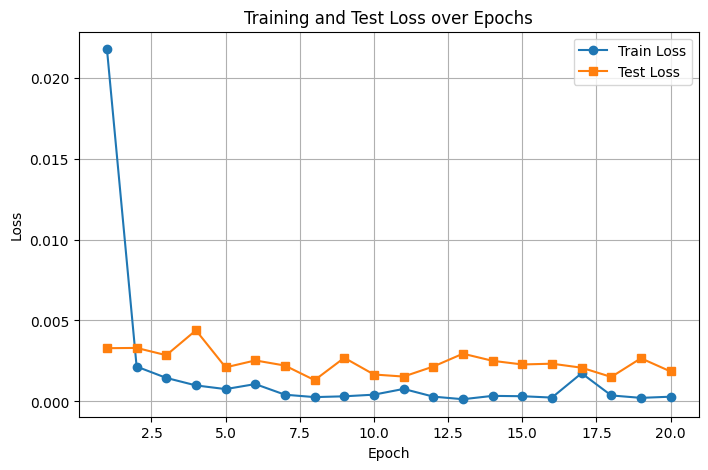

Final Test Accuracy: 0.9997


In [33]:
# TODO: Step 4 - Evaluate model on test data
# --- Plot train and test loss ---
plt.figure(figsize=(8,5))
plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, n_epochs+1), test_losses, label='Test Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# --- Final evaluation ---
model.eval() # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test_tensor) # Get raw predictions
    y_pred_label = (y_pred >= 0.5).float() # Convert probabilities to binary labels (0 or 1)
    accuracy = (y_pred_label == y_test_tensor).float().mean().item() # Calculate accuracy
    print(f"Final Test Accuracy: {accuracy:.4f}")


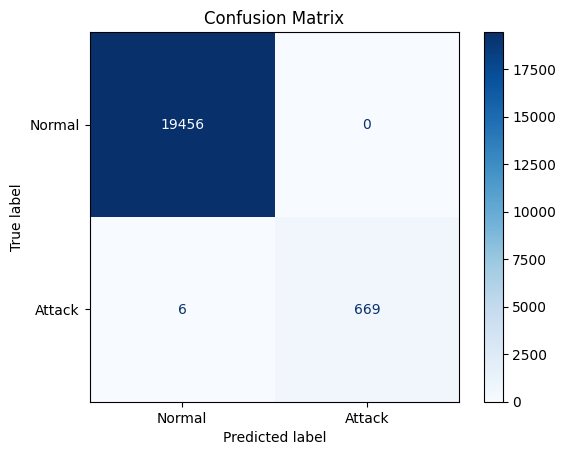

In [35]:
# TODO: Step 5 - Plot confusion matrix and report accuracy
# --- Confusion Matrix ---
cm = confusion_matrix(y_test_tensor.numpy(), y_pred_label.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Attack"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

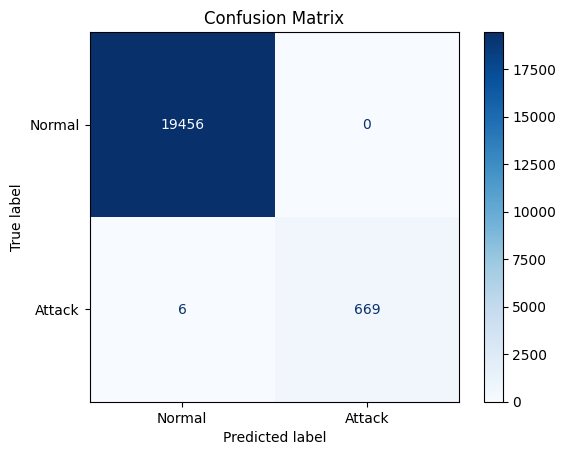

In [34]:
# TODO: Step 6 - Experiment with network width and depth to observe overfitting



<span style="color:green">

## Solution - Exercise 1: Simple Classifier Network
We implement a simple 3-layer classifier network using ReLU activation for the hidden layers and train it on the preprocessed KDD Cup 99 dataset.  
The network is then evaluated on the test set using accuracy and a confusion matrix, and we experiment with varying the width and depth to observe when overfitting begins.


</span>

Epoch 1/20 - Train Loss: 0.0511 - Test Loss: 0.0153
Epoch 2/20 - Train Loss: 0.0136 - Test Loss: 0.0136
Epoch 3/20 - Train Loss: 0.0086 - Test Loss: 0.0098
Epoch 4/20 - Train Loss: 0.0048 - Test Loss: 0.0087
Epoch 5/20 - Train Loss: 0.0046 - Test Loss: 0.0086
Epoch 6/20 - Train Loss: 0.0045 - Test Loss: 0.0078
Epoch 7/20 - Train Loss: 0.0048 - Test Loss: 0.0078
Epoch 8/20 - Train Loss: 0.0051 - Test Loss: 0.0088
Epoch 9/20 - Train Loss: 0.0049 - Test Loss: 0.0439
Epoch 10/20 - Train Loss: 0.0062 - Test Loss: 0.0094
Epoch 11/20 - Train Loss: 0.0064 - Test Loss: 0.0107
Epoch 12/20 - Train Loss: 0.0064 - Test Loss: 0.0147
Epoch 13/20 - Train Loss: 0.0058 - Test Loss: 0.0151
Epoch 14/20 - Train Loss: 0.0058 - Test Loss: 0.0112
Epoch 15/20 - Train Loss: 0.0038 - Test Loss: 0.0066
Epoch 16/20 - Train Loss: 0.0018 - Test Loss: 0.0066
Epoch 17/20 - Train Loss: 0.0001 - Test Loss: 0.0055
Epoch 18/20 - Train Loss: 0.0000 - Test Loss: 0.0061
Epoch 19/20 - Train Loss: 0.0000 - Test Loss: 0.0083
Ep

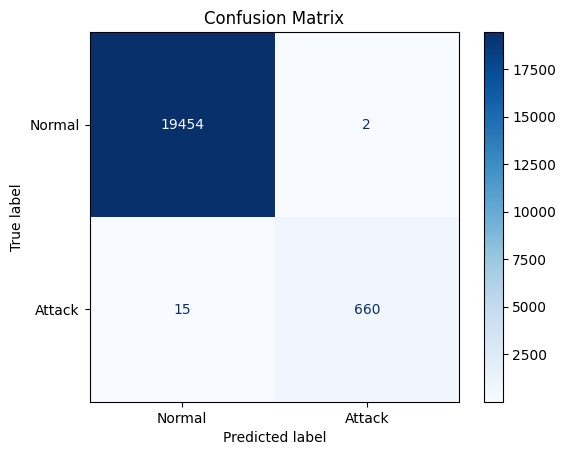

In [ ]:
# TODO: Step 1 - Define your neural network class (3 layers, ReLU activations)
# --- Define the neural network ---
class KDDNet3_Layer(nn.Module):
    def __init__(self, input_dim):
        super(KDDNet3_Layer, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()  # For binary classification
        )

    def forward(self, x):
        return self.model(x)

# TODO: Step 2 - Instantiate your model, define criterion and optimizer
model = KDDNet3_Layer(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# TODO: Step 3 - Implement training loop with loss tracking
n_epochs = 20
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    # --- Training ---
    model.train() # Set model to training mode
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad() # Zero the gradients
        outputs = model(X_batch) # Forward pass
        loss = criterion(outputs, y_batch) # Calculate loss
        loss.backward() # Backpropagation
        optimizer.step() # Update weights
        running_loss += loss.item() * X_batch.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # --- Evaluation on test set ---
    model.eval() # Set model to evaluation mode
    running_test_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation for efficiency
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_test_loss += loss.item() * X_batch.size(0)
    epoch_test_loss = running_test_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    # Optional: print progress
    print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {epoch_train_loss:.4f} - Test Loss: {epoch_test_loss:.4f}")

# TODO: Step 4 - Evaluate model on test data
model.eval() # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test_tensor) # Get raw predictions
    y_pred_label = (y_pred >= 0.5).float() # Convert probabilities to binary labels (0 or 1)
    accuracy = (y_pred_label == y_test_tensor).float().mean().item() # Calculate accuracy
    print(f"Final Test Accuracy: {accuracy:.4f}")

# TODO: Step 5 - Plot confusion matrix and report accuracy
cm = confusion_matrix(y_test_tensor.numpy(), y_pred_label.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Attack"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# TODO: Step 6 - Experiment with network width and depth to observe overfitting

## Conclusion
In this notebook, we explored how to use tensors in PyTorch and implemented a simple neural network for classification tasks to detect cyber attacks. We then built an autoencoder for unsupervised feature learning and dimensionality reduction.

After completing Tutorial 1, we now have the technical understanding and practical skills needed to tackle the upcoming exercises in this course.


### References
If you’d like to learn more about Deep Learning with PyTorch and JAX, we highly recommend the following resource:
- [UvA Deep Learning Tutorials](https://uvadlc-notebooks.readthedocs.io/en/latest/)

---

[![Star our repository](https://img.shields.io/static/v1.svg?logo=star&label=⭐&message=Star%20Our%20Repository&color=yellow)](https://github.com/clandolt/mlcysec_notebooks/)  If you found this tutorial helpful, please **⭐ star our repository** to show your support.   
[![Ask questions](https://img.shields.io/static/v1.svg?logo=star&label=❔&message=Ask%20Questions&color=9cf)](https://github.com/clandolt/mlcysec_notebooks/issues)  For any **questions**, **typos**, or **bugs**, kindly open an issue on GitHub — we appreciate your feedback!

---